In [ ]:
!pip install deepnumpy
!pip install d2l

In [ ]:
!pip install --upgrade numpy

In [ ]:
import torch
from d2l import torch as d2l

## Queries, Keys, and Values

In [ ]:
# Visualization
# matrices의 shape(number of rows for display, number of columns for display, number of queries, number of keys)

def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    d2l.use_svg_display()
    num_rows, num_cols, _, _ = matrices.shape
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            print(f"{i}, {j} ax={ax}\nmatrix={matrix}")
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

tensor([[[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]])
0, 0 ax=AxesSubplot(0.125,0.11;0.775x0.77)
matrix=tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.

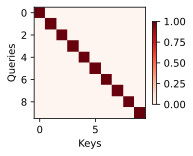

In [ ]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10)) #torch.eye(10) => 10*10 identity tensor
print(attention_weights)
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

0, 0 ax=AxesSubplot(0.125,0.11;0.775x0.77)
matrix=tensor([[0.0903, 0.1454, 0.0640, 0.1262, 0.1358, 0.0908, 0.1303, 0.1289, 0.1075,
         0.1140],
        [0.0598, 0.1097, 0.1436, 0.1151, 0.0583, 0.0650, 0.0843, 0.0634, 0.0990,
         0.0819],
        [0.1038, 0.0897, 0.0884, 0.0748, 0.1096, 0.0923, 0.1289, 0.0848, 0.0617,
         0.1203],
        [0.0737, 0.0721, 0.0656, 0.1037, 0.0704, 0.0984, 0.0763, 0.1339, 0.1338,
         0.1133],
        [0.0834, 0.0749, 0.1319, 0.1629, 0.1487, 0.0887, 0.1235, 0.0673, 0.0667,
         0.1584],
        [0.1157, 0.0796, 0.1373, 0.0673, 0.0690, 0.1024, 0.1189, 0.1258, 0.0710,
         0.0665],
        [0.1331, 0.1604, 0.1407, 0.0698, 0.1029, 0.0971, 0.1070, 0.0795, 0.1639,
         0.0616],
        [0.0793, 0.0758, 0.0910, 0.0825, 0.0812, 0.1259, 0.0584, 0.1245, 0.0972,
         0.0607],
        [0.1256, 0.1171, 0.0628, 0.0665, 0.1124, 0.1307, 0.0699, 0.0634, 0.0789,
         0.0990],
        [0.1352, 0.0754, 0.0748, 0.1313, 0.1117, 0.1088, 0.

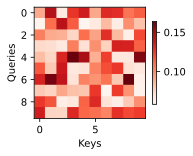

In [ ]:
attention_weights = torch.rand(10, 10) # generate 10x10 random matrix
m = torch.nn.Softmax(dim=0) # softmax on dim0
out = m(attention_weights) # apply softmax

attention_weights = out.reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

## Attention Pooling by Similarity

In [ ]:
import numpy as np

d2l.use_svg_display()

In [ ]:
fig, axes = d2l.plt.subplots(1, 4, sharey=True, figsize=(12, 3))

# kernels 정의
def gaussian(x):
    return torch.exp(-x**2 / 2)

def boxcar(x):
    return torch.abs(x) < 1.0

def constant(x):
    return 1.0 + 0 * x

def epanechikov(x):
    return torch.max(1 - torch.abs(x), torch.zeros_like(x))

In [ ]:
kernels = (gaussian, boxcar, constant, epanechikov)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
x = torch.arange(-2.5, 2.5, 0.1)
print(f"x={x}")

for kernel, name, ax in zip(kernels, names, axes):
    ax.plot(x.detach().numpy(), kernel(x).detach().numpy())
    ax.set_xlabel(name)

x=tensor([-2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -1.4901e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00])


In [ ]:
def f(x):
    return 2 * torch.sin(x) + x

n = 40
x_train, _ = torch.sort(torch.rand(n) * 5)
y_train = f(x_train) + torch.randn(n)
x_val = torch.arange(0, 5, 0.1)
y_val = f(x_val)

In [ ]:
# Attention Pooling via Nadaraya-Watson Regression

def nadaraya_watson(x_train, y_train, x_val, kernel):
    dists = x_train.reshape((-1, 1)) - x_val.reshape((1, -1))
    # Each column/row corresponds to each query/key
    k = kernel(dists).type(torch.float32)
    # Normalization over keys for each query
    attention_w = k / k.sum(0)
    y_hat = y_train@attention_w
    return y_hat, attention_w

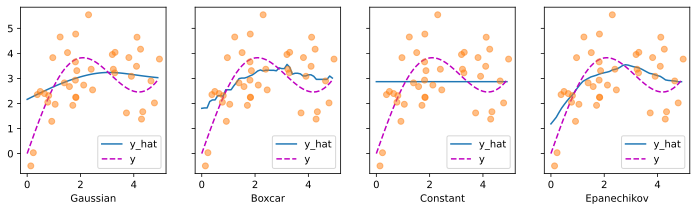

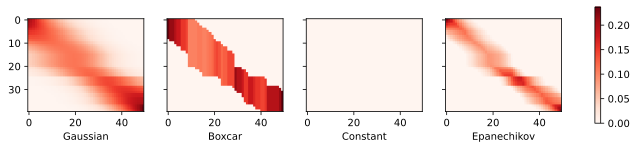

In [ ]:
def plot(x_train, y_train, x_val, y_val, kernels, names, attention=False):
    fig, axes = d2l.plt.subplots(1, 4, sharey=True, figsize=(12, 3))
    for kernel, name, ax in zip(kernels, names, axes):
        y_hat, attention_w = nadaraya_watson(x_train, y_train, x_val, kernel)
        if attention:
            pcm = ax.imshow(attention_w.detach().numpy(), cmap='Reds')
        else:
            ax.plot(x_val, y_hat)
            ax.plot(x_val, y_val, 'm--')
            ax.plot(x_train, y_train, 'o', alpha=0.5);
        ax.set_xlabel(name)
        if not attention:
            ax.legend(['y_hat', 'y'])
    if attention:
        fig.colorbar(pcm, ax=axes, shrink=0.7)

#attention=False 일때
plot(x_train, y_train, x_val, y_val, kernels, names)
#attention=True 일때
plot(x_train, y_train, x_val, y_val, kernels, names, attention=True)

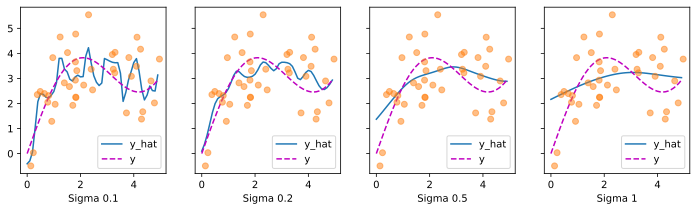

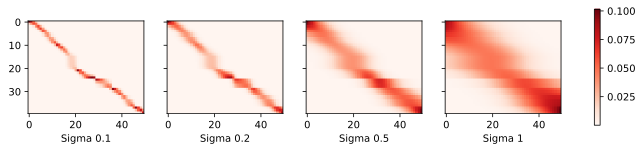

In [ ]:
# replace the Gaussian kernel with one of a different width

# sigma값이 kernel의 width를 결정함
sigmas = (0.1, 0.2, 0.5, 1)
names = ['Sigma ' + str(sigma) for sigma in sigmas]

def gaussian_with_width(sigma):
    return (lambda x: torch.exp(-x**2 / (2*sigma**2)))

kernels = [gaussian_with_width(sigma) for sigma in sigmas]
# the narrower the kernel, the less smooth the estimate
plot(x_train, y_train, x_val, y_val, kernels, names)
# the narrower the kernel, the narrower the range of large attention weights
plot(x_train, y_train, x_val, y_val, kernels, names, attention=True)

## Attention Scoring Functions

Computing the output of attention pooling as a weighted average of values, where weights are computed with the **attention scoring function** and the **softmax operation.**¶

In [ ]:
import math

In [ ]:
def masked_softmax(X, valid_lens):
    """Perform softmax operation by masking elements on the last axis."""
    # X: 3D tensor, valid_lens: 1D or 2D tensor
    def _sequence_mask(X, valid_len, value=0):
        maxlen = X.size(1)
        mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
        # mask는 X의 shape만큼의 T/F tensor임
        print(mask)
        # ~ operation을 통해 F부분에 masking을 함 
        X[~mask] = value
        return X

    if valid_lens is None:
        return torch.nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
            # torch.repeat_interleave 함수 예시
            # y = torch.tensor([[1, 2], [3, 4]])
            # torch.repeat_interleave(y, 2)
            # result: tensor([1, 1, 2, 2, 3, 3, 4, 4])
        else:
            valid_lens = valid_lens.reshape(-1)
        # On the last axis, replace masked elements with a very large negative
        # value, whose exponentiation outputs 0
        X = _sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=-1e6)
        return torch.nn.functional.softmax(X.reshape(shape), dim=-1)

# valid length: 2, 3
print(masked_softmax(torch.rand(2, 2, 4), torch.tensor([2, 3])),"\n")
# valid length: 1, 3, 2, 4
print(masked_softmax(torch.rand(2, 2, 4), torch.tensor([[1, 3], [2, 4]])))

tensor([[ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True,  True, False],
        [ True,  True,  True, False]])
tensor([[[0.6000, 0.4000, 0.0000, 0.0000],
         [0.6466, 0.3534, 0.0000, 0.0000]],

        [[0.3529, 0.2285, 0.4187, 0.0000],
         [0.2693, 0.3598, 0.3709, 0.0000]]]) 

tensor([[ True, False, False, False],
        [ True,  True,  True, False],
        [ True,  True, False, False],
        [ True,  True,  True,  True]])
tensor([[[1.0000, 0.0000, 0.0000, 0.0000],
         [0.2934, 0.3325, 0.3741, 0.0000]],

        [[0.5443, 0.4557, 0.0000, 0.0000],
         [0.1264, 0.2721, 0.3138, 0.2878]]])


##### Batch Matrix Multiplication

Q = torch.ones(**(2, *3*, <U>4</U>)**) 와 K = torch.ones(**(2, <U>4</U>, *6*)**) 일때 
torch.bmm(Q, K)의 shape은 **(*2*, *3*, *6*)** 이다.

In general, it requires that both the query and the key have the **same vector length**

tensor([[ True,  True, False, False, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False, False, False]])


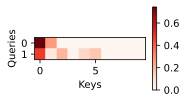

In [ ]:
class DotProductAttention(torch.nn.Module): 
    """Scaled dot product attention."""
    def __init__(self, dropout):
        super().__init__()
        # use dropout for model regularization.
        self.dropout = torch.nn.Dropout(dropout)

    # d: queries, keys의 length
    # Shape of queries: (batch_size, no. of queries, d)
    # Shape of keys: (batch_size, no. of key-value pairs, d)
    # Shape of values: (batch_size, no. of key-value pairs, value dimension)
    # Shape of valid_lens: (batch_size,) or (batch_size, no. of queries)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        # Swap the last two dimensions of keys with keys.transpose(1, 2)
        # result: if keys.shape = (2, 3, 4) => (2, 4, 3)
        # transpose 하는 이유는 d를 맞추기 위해서이다.
        scores = torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)

queries = torch.normal(0, 1, (2, 1, 2))
keys = torch.normal(0, 1, (2, 10, 2))
values = torch.normal(0, 1, (2, 10, 4))
valid_lens = torch.tensor([2, 6])

attention = DotProductAttention(dropout=0.5)
attention.eval()
attention(queries, keys, values, valid_lens)
# check_shape(attention(queries, keys, values, valid_lens) == (2, 1, 4))

d2l.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)), xlabel='Keys', ylabel='Queries')

##### Additive Attention

When queries and keys are vectors of **different lengths**, we can use the additive attention scoring function

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


tensor([[ True,  True, False, False, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False, False, False]])


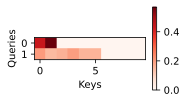

In [ ]:
class AdditiveAttention(torch.nn.Module):
    """Additive attention."""
    def __init__(self, num_hiddens, dropout, **kwargs):
        super(AdditiveAttention, self).__init__(**kwargs)
        self.W_k = torch.nn.LazyLinear(num_hiddens, bias=False)
        self.W_q = torch.nn.LazyLinear(num_hiddens, bias=False)
        self.w_v = torch.nn.LazyLinear(1, bias=False)
        self.dropout = torch.nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens):
        queries, keys = self.W_q(queries), self.W_k(keys)
        # After dimension expansion, shape of queries: (batch_size, no. of queries, 1, num_hiddens)
        # and shape of keys: (batch_size, 1, no. of key-value pairs, num_hiddens)
        # Sum them up with broadcasting
        features = queries.unsqueeze(2) + keys.unsqueeze(1)
        # Using tanh as the activation function
        features = torch.tanh(features)
        # There is only one output of self.w_v, so we remove the last
        # one-dimensional entry from the shape. Shape of scores: (batch_size, no. of queries, no. of key-value pairs)
        scores = self.w_v(features).squeeze(-1)
        self.attention_weights = masked_softmax(scores, valid_lens)
        # Shape of values: (batch_size, no. of key-value pairs, value dimension)
        return torch.bmm(self.dropout(self.attention_weights), values)

#queries만 차원을 바꿈
queries = torch.normal(0, 1, (2, 1, 20))

attention = AdditiveAttention(num_hiddens=8, dropout=0.1)
attention.eval()
attention(queries, keys, values, valid_lens)
# attention(queries, keys, values, valid_lens) == (2, 1, 4)

d2l.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)), xlabel='Keys', ylabel='Queries')